# Longitudinal Shower Profile

In [51]:
import geeksw.hgcal.testbeam as hgc
from geeksw.utils import effrms
import numpy as np
import matplotlib.pyplot as plt

We want to plot median energy fraction in each layer in terms of $X_0$, so these are all the columns we need:

In [52]:
columns = ["event", "rechit_energy",  "rechit_X0", "rechit_layer"]

It is not necessary to look at all runs at once, since one run alone has already about 10000 events which gives us a small enough statistical uncertainty. We just want to extract one electron run with configuration 1 for each available energy.

In [53]:
selected_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[0])

Next we define a little function that plots the median longitudinal profile for a run. More comments in the code:

In [54]:
def plot_profile(run):
    """Plot longitudinal profile.
    """
    # Get the energy from the run information
    energy = hgc.run_info(run).Energy.values[0]
    # Load the run data
    df = hgc.load_run(run, columns=columns, verbosity=1)
    # Keep track of the X_0 that corresponds to the 28th layer (for later)
    x0_max = df.query("rechit_layer == 28").rechit_X0.values[0]
    
    df = df[df.rechit_X0 <= x0_max]
    
    df = df.groupby(["event", "rechit_X0"]).sum().reset_index()
    
    x0 = np.sort(df["rechit_X0"].unique())
    
    energy_groups = df.groupby("rechit_X0")["rechit_energy"]
    energies_median = energy_groups.mean().values
    energies_stdevs = energy_groups.apply(effrms).values

    plt.errorbar(x0, energies_median, yerr=energies_stdevs, fmt="o-", markersize=2, label=str(energy) + " GeV")

Finally, we plot the profile for every third energy such that the plot doeos not get too crowded.

Loading rechitntupler/hits from run 436... Done.
Loading rechitntupler/hits from run 466... Done.
Loading rechitntupler/hits from run 493... Done.
Loading rechitntupler/hits from run 405... Done.


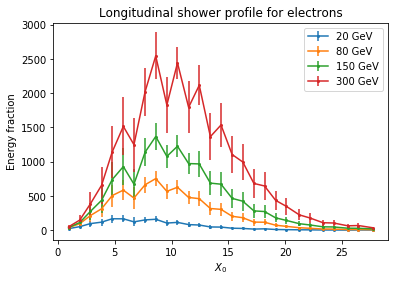

In [55]:
plt.figure()
for run in selected_runlist.Run[::3]:
    plot_profile(run)
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons")
plt.show()

We observe the trend we expect: electrons with higher energy generally go deeper into the calorimeter.